In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import pickle
from pathlib import Path

In [57]:
a_m_path: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/aethr_m_subset_aethr_features_overlapped_02102025.pkl')
a_c_path: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/aethr_subset_aethr_features_overlapped_01312025.pkl')
c_path: Path = Path('/Users/christopherpuglisi/Netrias/Projects/hyperparameter_optimizer/tests/cares_subset_aethr_features_overlapped_01312025.pkl')

## Distribution EDA

In [58]:
with open(a_m_path, 'rb') as f:
    a_m_df = pickle.load(f)

In [59]:
with open(a_c_path, 'rb') as f:
    a_c_df = pickle.load(f)

In [60]:
with open(c_path, 'rb') as f:
    c_df = pickle.load(f)

In [61]:
a_c_df = a_c_df.rename(columns={'Donor_meta_col': 'Donor'})

In [62]:
a_m_df['Donor'] = a_m_df['Donor'].map({1: 'D1', 2: 'D2', 3: 'D3'})

In [65]:
# Split 'V-T-D' into 'Virus', 'Time', and 'Donor'
#c_df[['Virus', 'Time', 'Donor']] = c_df['V-T-D'].str.split(' ', n=2, expand=True)

# Move the new columns to the front
#column_order = ['Virus', 'Time', 'Donor'] + [col for col in c_df.columns if col != 'V-T-D']

# Reorder DataFrame
#c_df = c_df[column_order].iloc[:,:-3]

In [66]:
c_df = c_df.iloc[:,:-3]

In [67]:
c_df

,Virus,Time,Donor,Replicate,Threat,A1A5D9,A6NDG6,O00233,O00299,O00391,...,Q13310,Q13409,Q15366,Q15717,Q4V328,Q8N392,Q96CX2,Q96JP5,Q9BW30,Q9ULH7
Reporter intensity corrected 1 Uni_CoV_TMT_01_norm,MCK,12Hr,D2,R2,0,-1.158218,-0.269077,0.098598,-1.060446,-0.234550,...,0.685301,-0.613764,0.307572,0.912341,-0.185192,-0.421327,-0.473658,1.007522,-1.552185,-0.242119
Reporter intensity corrected 2 Uni_CoV_TMT_01_norm,CoV2-IT,12Hr,D3,R3,1,-0.274853,-0.712967,-2.016531,-1.524995,-0.784175,...,0.992573,-0.720217,-1.824128,0.350256,-0.321692,-0.720474,-0.194840,0.860775,-2.153271,-0.140851
Reporter intensity corrected 3 Uni_CoV_TMT_01_norm,NL63,12Hr,D1,R4,1,-0.481890,-0.075319,0.560151,0.455873,-1.705536,...,-0.334796,1.372352,0.684061,0.667376,0.375172,0.592702,0.040590,-0.675824,1.553892,-0.107620
Reporter intensity corrected 4 Uni_CoV_TMT_01_norm,MCK,12Hr,D3,R5,0,0.816020,-0.438158,-0.271178,-0.874365,0.204874,...,0.689114,-0.162557,-0.030401,-0.053162,-0.486163,-0.327751,0.185248,1.413279,-1.491060,-0.094967
Reporter intensity corrected 5 Uni_CoV_TMT_01_norm,CoV2-IT,12Hr,D1,R2,1,-0.081118,-0.455570,-0.014510,0.482565,-1.458611,...,-0.541360,-0.236405,0.708072,0.815857,0.062358,1.592261,-0.633535,0.164957,2.715845,-0.430098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reporter intensity corrected 11 Uni_CoV_TMT_24_norm,CoV2-IT,72Hr,D1,R5,1,2.009916,0.387189,0.649155,0.444729,-0.359432,...,0.060273,0.708259,0.232533,-0.326991,0.647104,-2.034394,0.910661,0.210043,-2.473472,-0.104463
Reporter intensity corrected 12 Uni_CoV_TMT_24_norm,CoV2-WA,72Hr,D3,R3,1,0.929342,0.313200,0.291033,-0.509631,0.296270,...,0.269897,0.255442,-0.063263,0.205352,-0.667247,0.203574,1.430659,0.781242,-1.398977,-0.793731
Reporter intensity corrected 13 Uni_CoV_TMT_24_norm,CoV2-WA,72Hr,D2,R1,1,-0.445799,0.323524,0.776475,0.409336,0.146073,...,1.078997,-0.210098,1.086281,0.433419,-0.236712,-1.702238,-0.282167,-0.184195,-1.796556,0.082939
Reporter intensity corrected 14 Uni_CoV_TMT_24_norm,MCK,72Hr,D3,R2,0,1.580175,-0.349718,0.521040,0.069884,4.266152,...,0.299168,-0.401082,-0.079968,-0.139331,-0.304015,0.838479,-0.298939,0.266421,0.626310,-0.770035


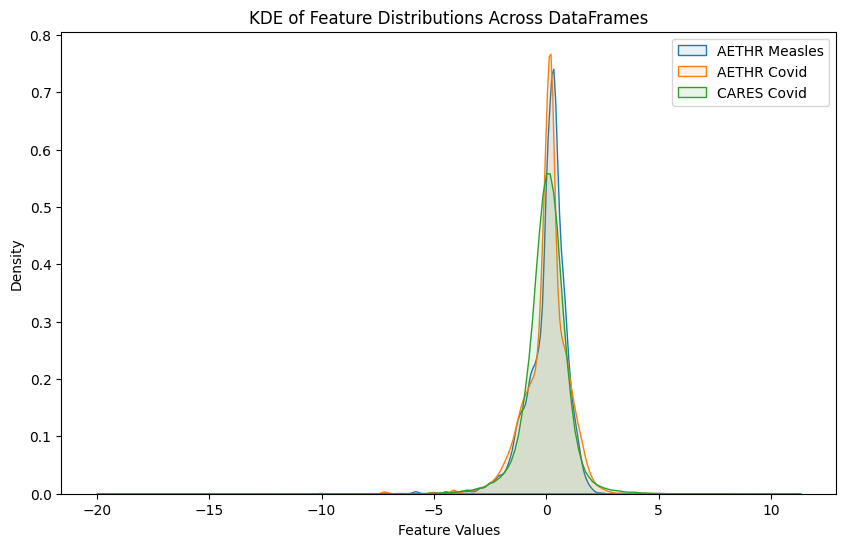

In [68]:
dfs = {
    "AETHR Measles": a_m_df.iloc[:, 11:],
    "AETHR Covid": a_c_df.iloc[:, 29:],
    "CARES Covid": c_df.iloc[:, 5:]
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Define colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Adjust as needed

# Plot KDEs for each DataFrame
for (label, df), color in zip(dfs.items(), colors):
    flattened_values = df.values.flatten()  # Flatten all feature values
    sns.kdeplot(flattened_values, label=label, color=color, fill=True, alpha=0.1, linewidth=1)

# Customize the plot
plt.xlabel("Feature Values")
plt.ylabel("Density")
plt.title("KDE of Feature Distributions Across DataFrames")
plt.legend()
plt.show()

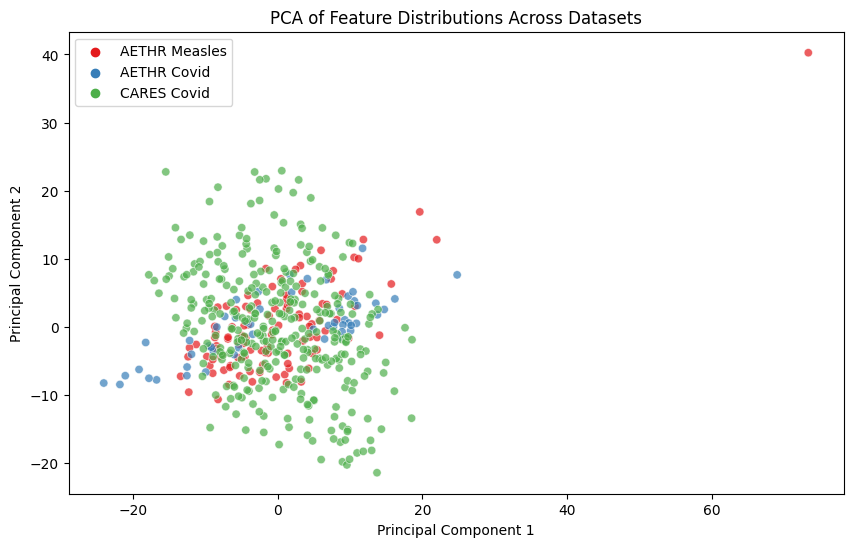

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the DataFrames and their respective feature columns
dfs = {
    "AETHR Measles": a_m_df.iloc[:, 11:],
    "AETHR Covid": a_c_df.iloc[:, 29:],
    "CARES Covid": c_df.iloc[:, 5:]
}

# Ensure all DataFrames have the same feature columns by finding missing ones and adding them as 0s
all_features = set().union(*[set(df.columns) for df in dfs.values()])

# Align all DataFrames to have the same columns
aligned_dfs = {}
for label, df in dfs.items():
    missing_cols = all_features - set(df.columns)
    for col in missing_cols:
        df[col] = 0  # Add missing columns with zeros
    aligned_dfs[label] = df[sorted(all_features)]  # Ensure consistent column order

# Standardize and concatenate data
all_data = []
labels = []

for label, df in aligned_dfs.items():
    scaled_data = StandardScaler().fit_transform(df)  # Standardizing the features
    all_data.append(scaled_data)
    labels.extend([label] * df.shape[0])  # Assign dataset labels to each observation

# Stack all datasets into a single array
all_data = np.vstack(all_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_data)

# Create DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Dataset'] = labels

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Dataset', data=pca_df, alpha=0.7, palette='Set1')
plt.title('PCA of Feature Distributions Across Datasets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [75]:
c_df['Donor'].unique()

array(['D2', 'D3', 'D1'], dtype=object)

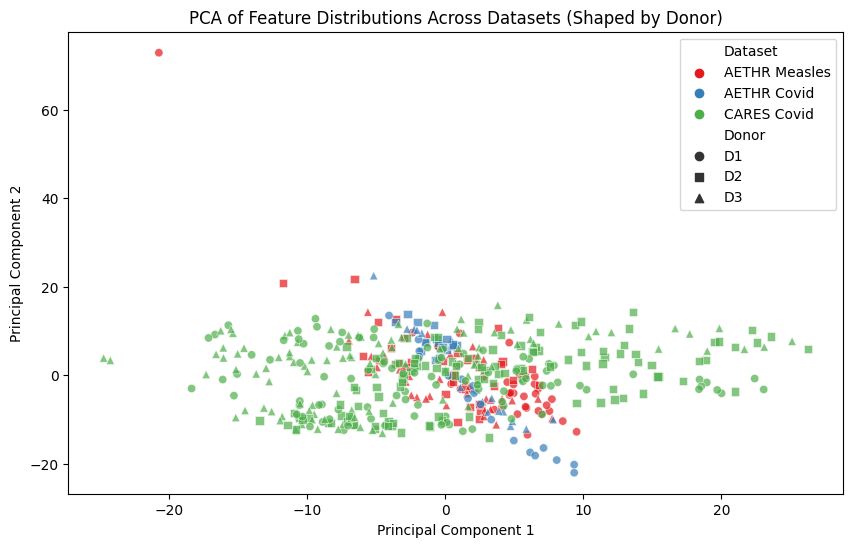

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract features and donor column separately
dfs = {
    "AETHR Measles": (a_m_df.iloc[:, 11:].copy(), a_m_df['Donor']),
    "AETHR Covid": (a_c_df.iloc[:, 29:].copy(), a_c_df['Donor']),
    "CARES Covid": (c_df.iloc[:, 5:].copy(), c_df['Donor'])
}

# Get the full set of features across all datasets
all_features = set().union(*[set(df[0].columns) for df in dfs.values()])

# Align all DataFrames to have the same feature columns and retain Donor info
aligned_dfs = []
for label, (df, donor_col) in dfs.items():
    df = df.copy()  # Prevent modifying original data
    df['Dataset'] = label  # Add dataset label

    # Add missing feature columns with zeros
    missing_cols = all_features - set(df.columns)
    for col in missing_cols:
        df[col] = 0

    # Re-add Donor column
    df['Donor'] = donor_col.values  # Ensure correct donor mapping

    # Ensure column order consistency
    aligned_dfs.append(df[sorted(all_features) + ['Dataset', 'Donor']])

# Combine all datasets into one DataFrame
combined_df = pd.concat(aligned_dfs, ignore_index=True)

# Standardize feature columns
features = sorted(all_features)
scaled_data = combined_df[features]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to the DataFrame
combined_df['PC1'] = pca_result[:, 0]
combined_df['PC2'] = pca_result[:, 1]

# Define marker shapes based on Donor column
donor_marker_map = {'D1': 'o', 'D2': 's', 'D3': '^'}  # Ensure these match actual donor values

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Dataset', style='Donor', markers=donor_marker_map,
    data=combined_df, alpha=0.7, palette='Set1'
)
plt.title('PCA of Feature Distributions Across Datasets (Shaped by Donor)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [84]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

# Define the DataFrames and their respective feature columns
dfs = {
    "AETHR Measles": (a_m_df.iloc[:, 11:].copy(), a_m_df['Donor']),
    "AETHR Covid": (a_c_df.iloc[:, 29:].copy(), a_c_df['Donor']),
    "CARES Covid": (c_df.iloc[:, 5:].copy(), c_df['Donor'])
}

# Ensure all DataFrames have the same feature columns by finding missing ones and adding them as 0s
all_features = set().union(*[set(df[0].columns) for df in dfs.values()])

# Align all DataFrames to have the same feature columns
aligned_dfs = {}
for label, (df, donor_col) in dfs.items():
    df = df.copy()  # Prevent modifying original data
    
    # Add missing feature columns with zeros
    missing_cols = all_features - set(df.columns)
    for col in missing_cols:
        df[col] = 0

    # Store aligned DataFrame
    aligned_dfs[label] = df

# Perform Kolmogorov-Smirnov test for each feature across dataset pairs and store results properly
stat_results = {}
for feature in all_features:
    stat_results[feature] = {
        f"{d1} vs {d2}": ks_2samp(aligned_dfs[d1][feature], aligned_dfs[d2][feature]).pvalue
        for d1 in aligned_dfs for d2 in aligned_dfs if d1 < d2
    }

# Convert to DataFrame
ks_df = pd.DataFrame(stat_results).T

In [85]:
ks_df

,AETHR Measles vs CARES Covid,AETHR Covid vs AETHR Measles,AETHR Covid vs CARES Covid
Q9BQS8,1.507199e-23,7.305241e-06,1.286404e-02
Q8IWX8,1.351007e-04,2.938636e-05,3.476841e-03
P27635,1.409324e-03,5.242549e-04,3.046358e-02
P78527,2.361871e-01,3.939620e-01,2.005865e-01
O60220,2.480144e-14,2.207694e-10,7.423599e-03
...,...,...,...
Q9Y3S1,5.426593e-18,1.115840e-08,3.025374e-01
P62191,6.366840e-05,6.117308e-02,2.143753e-05
P19404,1.008025e-02,5.610128e-01,9.717602e-02
P49916,1.060947e-23,6.971354e-24,7.242476e-12


In [86]:
# Define significance threshold
alpha = 0.05

# Compute proportions of significantly different and not significantly different for each column
sig_props = ks_df.apply(lambda col: (col < alpha).mean(), axis=0)
non_sig_props = 1 - sig_props

# Create a summary DataFrame
sig_summary_df = pd.DataFrame({
    "Significantly Different Proportion": sig_props,
    "Not Significantly Different Proportion": non_sig_props
})

In [87]:
sig_summary_df

,Significantly Different Proportion,Not Significantly Different Proportion
AETHR Measles vs CARES Covid,0.720143,0.279857
AETHR Covid vs AETHR Measles,0.565062,0.434938
AETHR Covid vs CARES Covid,0.739750,0.260250


In [88]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

# Define the DataFrames and their respective feature columns
dfs = {
    "AETHR Measles": (a_m_df.iloc[:, 11:].copy(), a_m_df['Donor']),
    "AETHR Covid": (a_c_df.iloc[:, 29:].copy(), a_c_df['Donor']),
    "CARES Covid": (c_df.iloc[:, 5:].copy(), c_df['Donor'])
}

# Define the specific features (Uniprot IDs) to analyze
uniprot_ids = [
    'Q9Y265', 'Q9NR46', 'P09914', 'Q13421', 'P80188', 'O00233', 'P60763', 'P49406', 'Q9BR76', 'O14672',
    'P17936', 'Q7L5N1', 'Q15717', 'P30153', 'Q8NC56', 'P00167', 'Q96BP2', 'Q14694', 'A1A5D9', 'Q8IXQ6',
    'P78318', 'Q13310', 'P53007', 'P62070', 'P80217', 'Q9UJY5', 'P49821', 'O43865', 'P42224', 'Q96MU7',
    'Q9P258', 'Q96TA2', 'P39019', 'O95831', 'Q53GD3', 'Q9UIA9'
]

# Align all DataFrames to have only the selected feature columns, filling missing ones with zeros
aligned_dfs = {}
for label, (df, donor_col) in dfs.items():
    df = df.copy()  # Prevent modifying original data

    # Keep only the selected features, fill missing ones with zeros
    df = df.reindex(columns=uniprot_ids, fill_value=0)

    # Store aligned DataFrame
    aligned_dfs[label] = df

# Perform Kolmogorov-Smirnov test for selected features across dataset pairs and store results
stat_results = {}
for feature in uniprot_ids:
    stat_results[feature] = {
        f"{d1} vs {d2}": ks_2samp(aligned_dfs[d1][feature], aligned_dfs[d2][feature]).pvalue
        for d1 in aligned_dfs for d2 in aligned_dfs if d1 < d2
    }

# Convert to DataFrame
ks_df = pd.DataFrame(stat_results).T

In [91]:
# Define significance threshold
alpha = 0.01

# Compute proportions of significantly different and not significantly different for each column
sig_props = ks_df.apply(lambda col: (col < alpha).mean(), axis=0)
non_sig_props = 1 - sig_props

# Create a summary DataFrame
sig_summary_df = pd.DataFrame({
    "Significantly Different Proportion": sig_props,
    "Not Significantly Different Proportion": non_sig_props
})

In [92]:
sig_summary_df

,Significantly Different Proportion,Not Significantly Different Proportion
AETHR Measles vs CARES Covid,0.611111,0.388889
AETHR Covid vs AETHR Measles,0.500000,0.500000
AETHR Covid vs CARES Covid,0.527778,0.472222


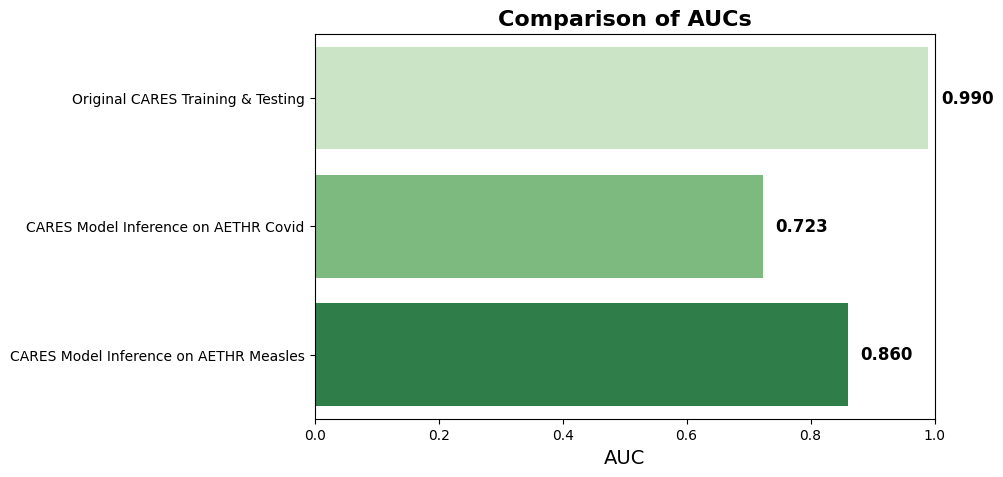

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
models = [
    "Original CARES Training & Testing", 
    "CARES Model Inference on AETHR Covid", 
    "CARES Model Inference on AETHR Measles"
]
auc_values = [0.99, 0.723, 0.86]

# Create color palette (shades of green)
colors = sns.color_palette("Greens", len(models))

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=auc_values, y=models, palette=colors)

# Add text labels
for i, v in enumerate(auc_values):
    ax.text(v + 0.02, i, f"{v:.3f}", va="center", fontsize=12, fontweight='bold')

# Customize plot
plt.xlabel("AUC", fontsize=14)
plt.ylabel("")
plt.xlim(0, 1)
plt.title("Comparison of AUCs", fontsize=16, fontweight="bold")

# Show plot
plt.show()